In [2]:
# simple linear regression
#data collection
import seaborn as sns
import pandas as pd
df=sns.load_dataset('tips')
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [7]:
#underastanding data and its statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


checking relationship before using any model,we must confirm relationship..?

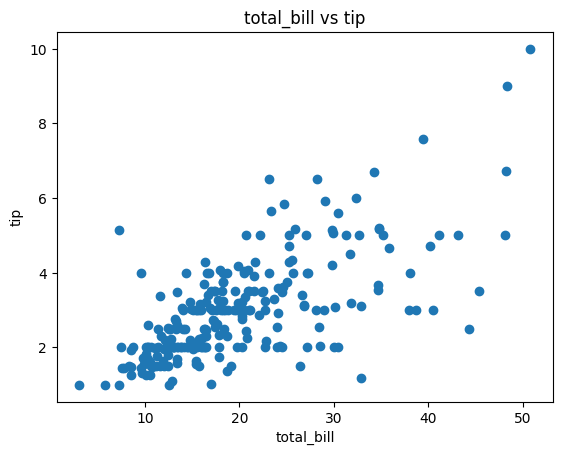

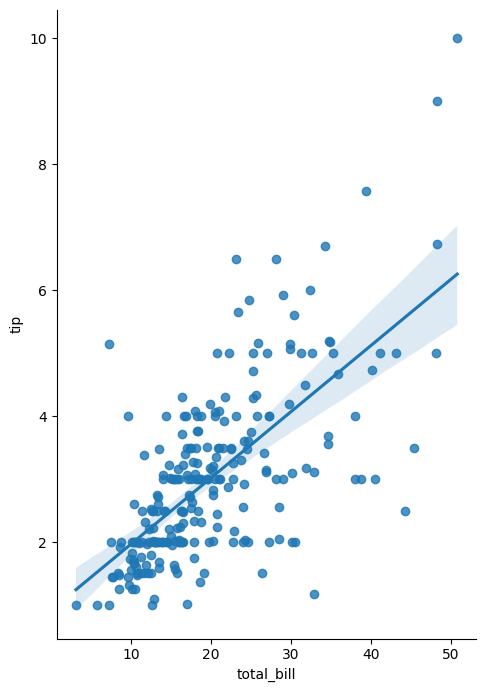

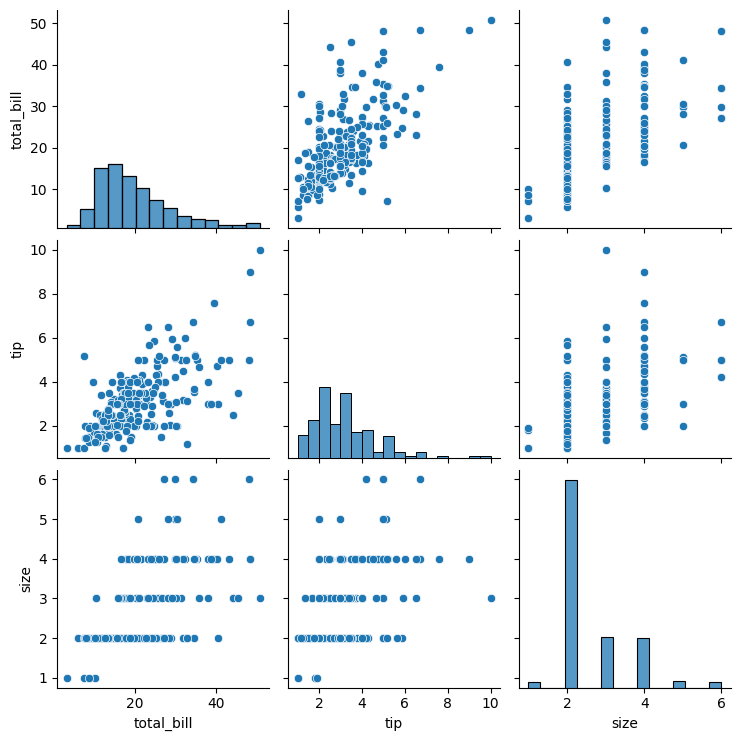

In [14]:
#checking relationship before using any model,we must confirm relationship..?
import matplotlib.pyplot as plt
plt.scatter(df.total_bill,df.tip)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('total_bill vs tip')
plt.show()
sns.pairplot(df,x_vars=['total_bill'],y_vars='tip',height=7,aspect=0.7,kind='reg')
sns.pairplot(df)

observation:
1.as bill increases tip increases
2.relationship =st.line(we can apply linear reg)


In [25]:
#feature and target separation
x=df[['total_bill']] #feature input is always 2D
y=df['tip']#feature output is always 1D




In [26]:
!pip install scikit-learn


In [27]:
#--- train test split ---
# why...?   a model must perform well on unseen data...
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 means 20% data will be used for testing purpose and 80% data will be used for training purpose
#random_state=42: in the 80% of data it randomly selects 42 data points for training purpose
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(195, 1) (49, 1) (195,) (49,)


In [28]:
#feature standardization
#why..? 1.compare the coefficients fairly 2.avoid the dominance of large values 3.prepare for ridge/lasso
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
# imp: fit only on training data,2.prevents the data leakage

fit() → learn parameters from training data

fit_transform() → learn + apply transformation on training data

transform() → apply learned transformation on test / validation / new data

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("coefficient (m):",model.coef_[0])
print("intercept (c):",model.intercept_) 
#y=mx+c       

coefficient (m): 0.9357171400271826
intercept (c): 3.0877948717948724


In [31]:
y_pred=model.predict(x_test_scaled)
print("predicted values:",y_pred)

predicted values: [3.04525623 1.86330727 3.55119456 3.69452593 2.31576375 2.83881627
 3.96728338 2.26014262 2.50615915 2.57033737 2.88160176 2.07723468
 2.06439904 2.47407003 2.00236009 2.91903905 2.92652651 3.23351235
 2.68478854 5.33107064 3.13831465 3.13403611 2.4558862  1.94673896
 3.16077703 2.17564129 2.02375283 3.62927807 2.68906708 6.07767732
 4.99734388 1.75313465 2.83025918 3.09552917 2.74040966 3.50092162
 2.21200895 5.53644096 2.33287794 3.35010279 2.04942412 2.47834858
 3.48701634 2.03017065 2.03124029 1.25361414 2.05798121 2.92438724
 1.73388118]


In [34]:
#model evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
rmse=(mean_squared_error(y_test,y_pred))**0.5
print("Root Mean Squared Error:",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
r2=r2_score(y_test,y_pred)
print("R2 score:",r2)

Root Mean Squared Error: 0.7541977545199626
Mean Absolute Error: 0.6208580000398983
Mean Squared Error: 0.5688142529229538
R2 score: 0.5449381659234664


<Axes: xlabel='total_bill', ylabel='tip'>

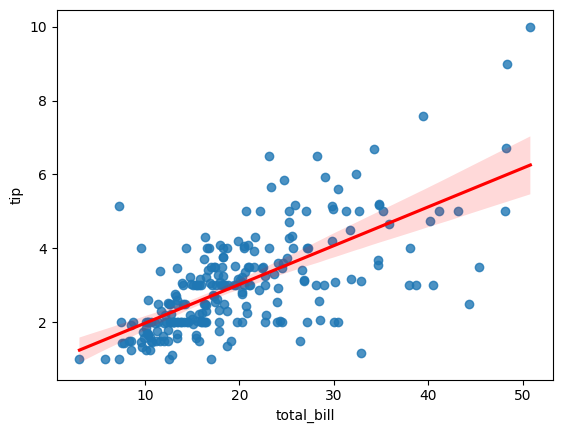

In [3]:
# data visualization best fit line
# plt.scatter(x,y)
# plt.plot(x,model.predict(scaler.transform(x)),color='red')
# plt.xlabel('total_bill')
# plt.ylabel('tip')
# plt.title('Best fit line: total_bill vs tip')
# plt.show()
sns.regplot(x='total_bill',y='tip',data=df,line_kws={'color':'red'})


In [49]:
# realtime prediction
bill_amount=float(input("Enter the total bill amount:"))
bill_amount_scaled=scaler.transform([[bill_amount]])
tip_amount=model.predict(bill_amount_scaled)
print("Predicted tip amount:",tip_amount)

Predicted tip amount: [3471.89752293]


c:\Users\ramas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
